<a href="https://colab.research.google.com/github/DhekerKacem/Porjet_olist/blob/Charaf/Notebooks/Projet_data_Olist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import pandas as pd
import numpy as np


In [7]:
import pandas as pd

# Définir les chemins des fichiers (modifie selon ton organisation)
path = "/content/drive/My Drive/Data_project_Olist/"

# Charger les datasets
leads_closed = pd.read_csv(path + "leads_closed.csv", sep="|", quotechar='"', encoding="utf-8")
leads_qualified = pd.read_csv(path + "leads_qualified.csv", sep="|", quotechar='"', encoding="utf-8")
product_category = pd.read_csv(path + "product_category_name_translation.csv", sep="|", quotechar='"', encoding="utf-8")
order_items = pd.read_csv(path + "order_items.csv", sep="|", quotechar='"', encoding="utf-8")


# Vérifier le chargement
print(leads_closed.head())
print(leads_qualified.head())
print(product_category.head())
print(order_items.head())


                             mql_id                         seller_id  \
0  5420aad7fec3549a85876ba1c529bd84  2c43fb513632d29b3b58df74816f1b06   
1  a555fb36b9368110ede0f043dfc3b9a0  bbb7d7893a450660432ea6652310ebb7   
2  327174d3648a2d047e8940d7d15204ca  612170e34b97004b3ba37eae81836b4c   
3  f5fee8f7da74f4887f5bcae2bafb6dd6  21e1781e36faf92725dde4730a88ca0f   
4  ffe640179b554e295c167a2f6be528e0  ed8cb7b190ceb6067227478e48cf8dde   

                             sdr_id                             sr_id  \
0  a8387c01a09e99ce014107505b92388c  4ef15afb4b2723d8f3d81e51ec7afefe   
1  09285259593c61296eef10c734121d5b  d3d1e91a157ea7f90548eef82f1955e3   
2  b90f87164b5f8c2cfa5c8572834dbe3f  6565aa9ce3178a5caf6171827af3a9ba   
3  56bf83c4bb35763a51c2baab501b4c67  d3d1e91a157ea7f90548eef82f1955e3   
4  4b339f9567d060bcea4f5136b9f5949e  d3d1e91a157ea7f90548eef82f1955e3   

              won_date business_segment      lead_type lead_behaviour_profile  \
0  2018-02-26 19:58:54              pet  

In [8]:
# Afficher des informations générales sur les datasets
print(leads_closed.info())
print(leads_qualified.info())
print(product_category.info())
print(order_items.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 842 entries, 0 to 841
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   mql_id                         842 non-null    object 
 1   seller_id                      842 non-null    object 
 2   sdr_id                         842 non-null    object 
 3   sr_id                          842 non-null    object 
 4   won_date                       842 non-null    object 
 5   business_segment               841 non-null    object 
 6   lead_type                      836 non-null    object 
 7   lead_behaviour_profile         665 non-null    object 
 8   has_company                    63 non-null     float64
 9   has_gtin                       64 non-null     float64
 10  average_stock                  66 non-null     object 
 11  business_type                  832 non-null    object 
 12  declared_product_catalog_size  69 non-null     flo

In [9]:
# Vérifier les valeurs manquantes
print(leads_closed.isnull().sum())
print(leads_qualified.isnull().sum())
print(product_category.isnull().sum())
print(order_items.isnull().sum)

mql_id                             0
seller_id                          0
sdr_id                             0
sr_id                              0
won_date                           0
business_segment                   1
lead_type                          6
lead_behaviour_profile           177
has_company                      779
has_gtin                         778
average_stock                    776
business_type                     10
declared_product_catalog_size    773
declared_monthly_revenue           0
dtype: int64
mql_id                 0
first_contact_date     0
landing_page_id        0
origin                60
dtype: int64
product_category_name            0
product_category_name_english    0
dtype: int64
<bound method DataFrame.sum of         order_id  order_item_id  product_id  seller_id  shipping_limit_date  \
0          False          False       False      False                False   
1          False          False       False      False                False   
2    

In [10]:
# Vérifier s'il y a des doublons
print(leads_closed.duplicated().sum())
print(leads_qualified.duplicated().sum())
print(product_category.duplicated().sum())
print(order_items.duplicated().sum())

0
0
0
0


In [11]:
# Afficher les statistiques descriptives
print(leads_closed.describe())
print(leads_qualified.describe())
print(product_category.describe())
print(order_items.describe())

       has_company   has_gtin  declared_product_catalog_size  \
count    63.000000  64.000000                      69.000000   
mean      0.920635   0.843750                     233.028986   
std       0.272479   0.365963                     352.380558   
min       0.000000   0.000000                       1.000000   
25%       1.000000   1.000000                      30.000000   
50%       1.000000   1.000000                     100.000000   
75%       1.000000   1.000000                     300.000000   
max       1.000000   1.000000                    2000.000000   

       declared_monthly_revenue  
count              8.420000e+02  
mean               7.337768e+04  
std                1.744799e+06  
min                0.000000e+00  
25%                0.000000e+00  
50%                0.000000e+00  
75%                0.000000e+00  
max                5.000000e+07  
                                  mql_id first_contact_date  \
count                               8000              

In [13]:
# Remplacement des valeurs manquantes dans leads_closed
leads_closed = leads_closed.assign(
    business_segment=leads_closed["business_segment"].fillna("Unknown"),
    lead_type=leads_closed["lead_type"].fillna("Unknown"),
    lead_behaviour_profile=leads_closed["lead_behaviour_profile"].fillna("Unknown"),
    business_type=leads_closed["business_type"].fillna("Unknown"),
    has_company=leads_closed["has_company"].fillna(0),
    has_gtin=leads_closed["has_gtin"].fillna(0),
    average_stock=pd.to_numeric(leads_closed["average_stock"], errors='coerce').fillna(
        leads_closed["average_stock"].median()
    ),
    declared_product_catalog_size=leads_closed["declared_product_catalog_size"].fillna(0),
)

# Remplacement des valeurs manquantes dans leads_qualified
leads_qualified = leads_qualified.assign(
    origin=leads_qualified["origin"].fillna("Unknown")
)


In [14]:
# Conversion des dates en datetime
leads_closed["won_date"] = pd.to_datetime(leads_closed["won_date"], errors='coerce')
leads_qualified["first_contact_date"] = pd.to_datetime(leads_qualified["first_contact_date"], errors='coerce')
order_items["shipping_limit_date"] = pd.to_datetime(order_items["shipping_limit_date"], errors='coerce')


In [15]:
# Suppression des doublons
leads_closed.drop_duplicates(inplace=True)
leads_qualified.drop_duplicates(inplace=True)
product_category.drop_duplicates(inplace=True)
order_items.drop_duplicates(inplace=True)


In [16]:
# Statistiques de base pour leads_closed
print("Statistiques descriptives de leads_closed :")
print(leads_closed.describe(include='all'))

# Statistiques de base pour leads_qualified
print("\nStatistiques descriptives de leads_qualified :")
print(leads_qualified.describe(include='all'))

# Statistiques de base pour order_items
print("\nStatistiques descriptives de order_items :")
print(order_items.describe(include='all'))


Statistiques descriptives de leads_closed :
                                  mql_id                         seller_id  \
count                                842                               842   
unique                               842                               842   
top     5420aad7fec3549a85876ba1c529bd84  2c43fb513632d29b3b58df74816f1b06   
freq                                   1                                 1   
mean                                 NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   
std                                  NaN                               NaN   

                   

Statistiques descriptives de leads_closed :
                                  mql_id                         seller_id  \
count                                842                               842   
unique                               842                               842   
top     5420aad7fec3549a85876ba1c529bd84  2c43fb513632d29b3b58df74816f1b06   
freq                                   1                                 1   
mean                                 NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   
std                                  NaN                               NaN   

                   

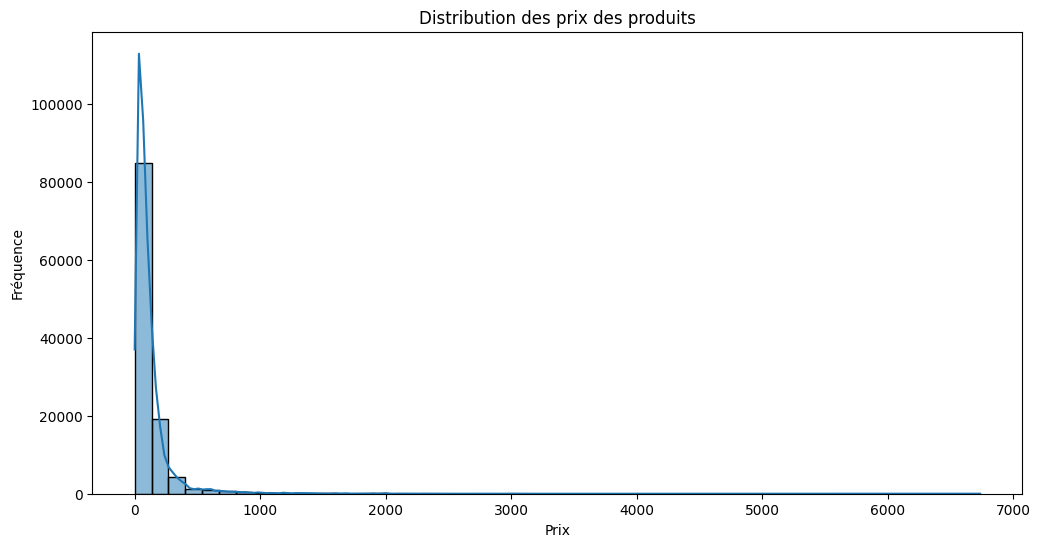

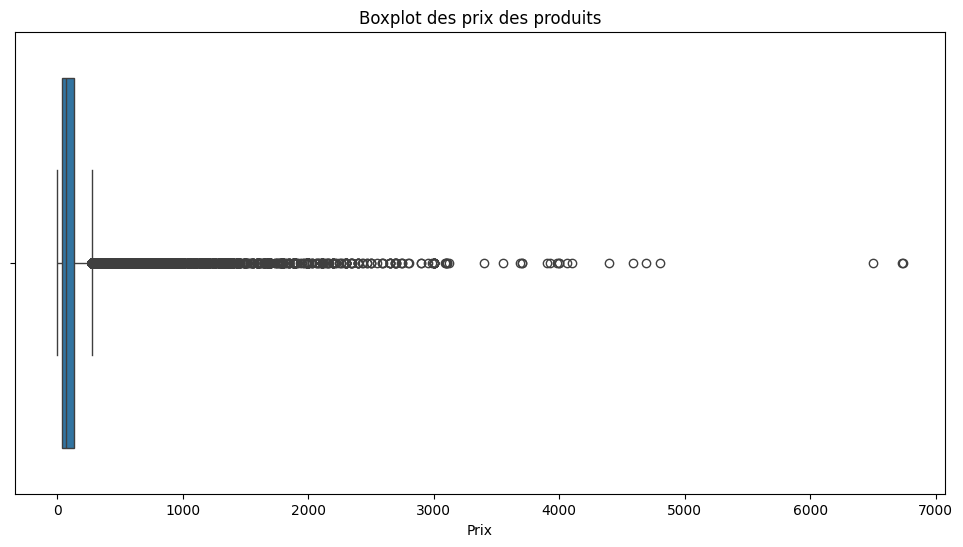

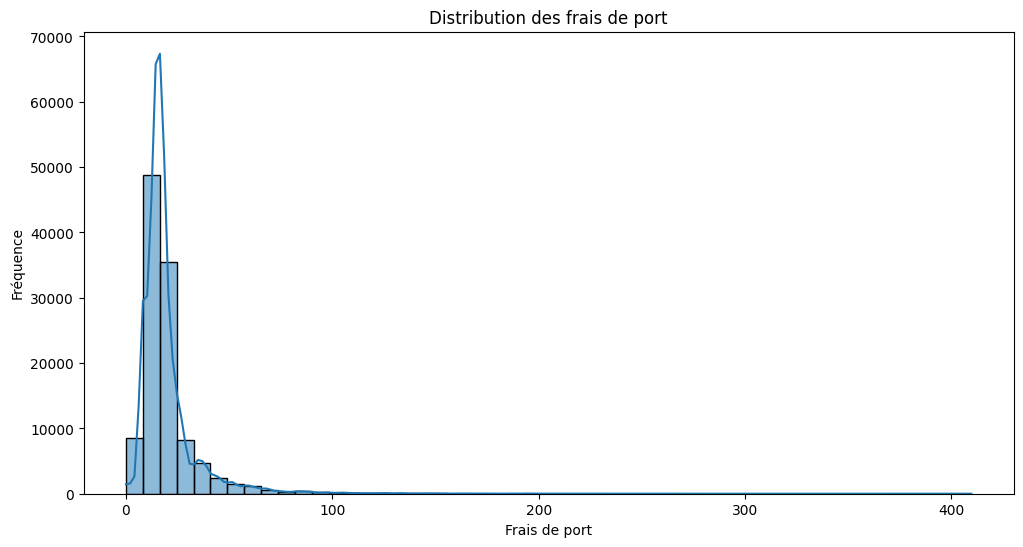

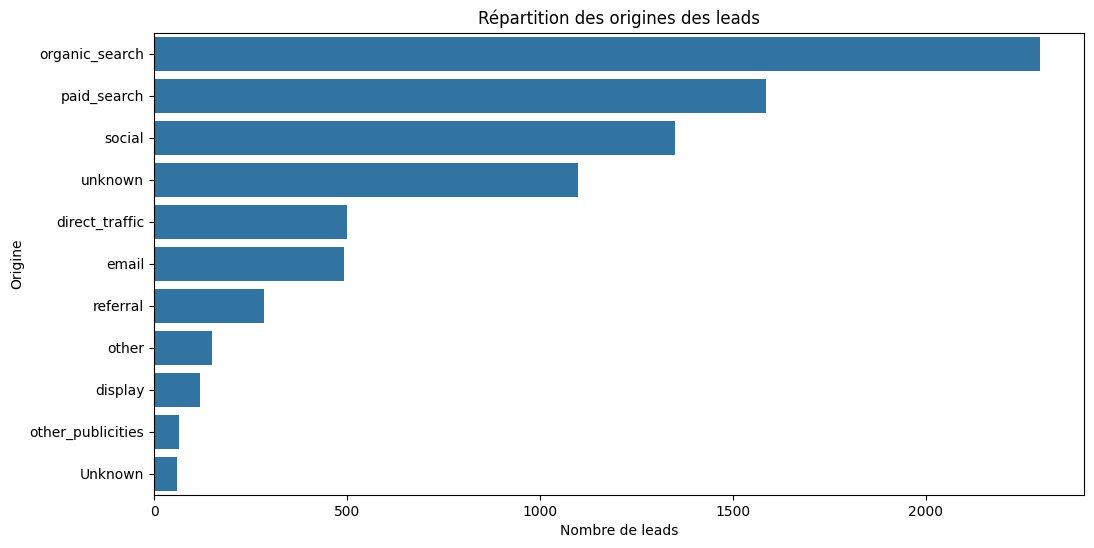

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Statistiques de base pour leads_closed
print("Statistiques descriptives de leads_closed :")
print(leads_closed.describe(include='all'))

# Statistiques de base pour leads_qualified
print("\nStatistiques descriptives de leads_qualified :")
print(leads_qualified.describe(include='all'))

# Statistiques de base pour order_items
print("\nStatistiques descriptives de order_items :")
print(order_items.describe(include='all'))

# Visualisation des distributions
plt.figure(figsize=(12, 6))
sns.histplot(order_items['price'], bins=50, kde=True)
plt.title("Distribution des prix des produits")
plt.xlabel("Prix")
plt.ylabel("Fréquence")
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x=order_items['price'])
plt.title("Boxplot des prix des produits")
plt.xlabel("Prix")
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(order_items['freight_value'], bins=50, kde=True)
plt.title("Distribution des frais de port")
plt.xlabel("Frais de port")
plt.ylabel("Fréquence")
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(y=leads_qualified['origin'], order=leads_qualified['origin'].value_counts().index)
plt.title("Répartition des origines des leads")
plt.xlabel("Nombre de leads")
plt.ylabel("Origine")
plt.show()


Valeurs manquantes par colonne :
mql_id                             0
seller_id                          0
sdr_id                             0
sr_id                              0
won_date                           0
business_segment                   1
lead_type                          6
lead_behaviour_profile           177
has_company                      779
has_gtin                         778
average_stock                    776
business_type                     10
declared_product_catalog_size    773
declared_monthly_revenue           0
dtype: int64
mql_id                 0
first_contact_date     0
landing_page_id        0
origin                60
dtype: int64
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Statistiques descriptives de leads_closed :
                                  mql_id                         seller_id  \
count       

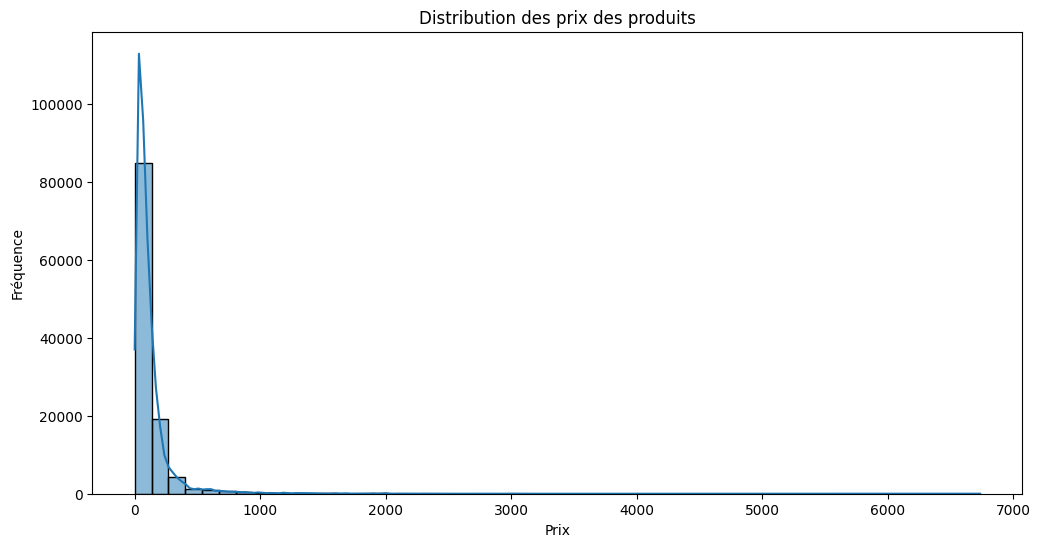

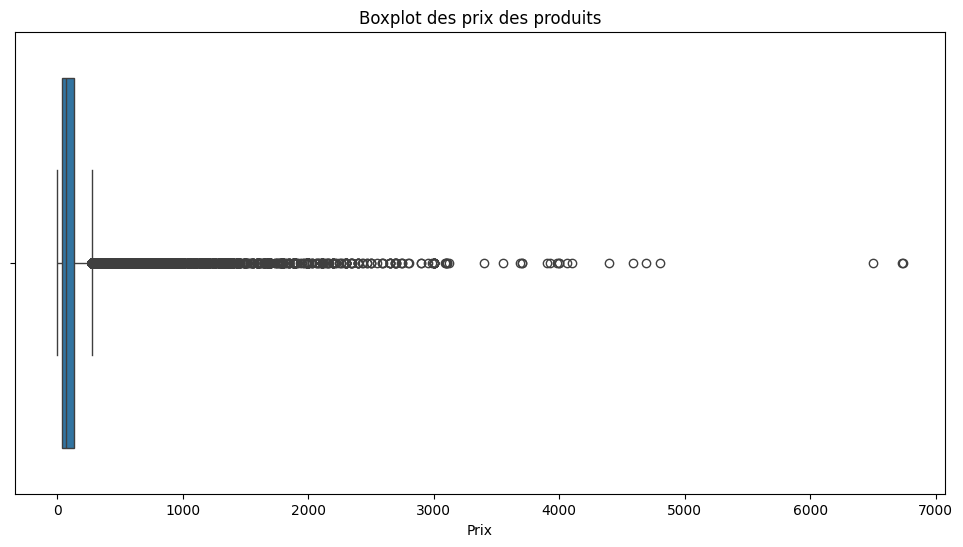

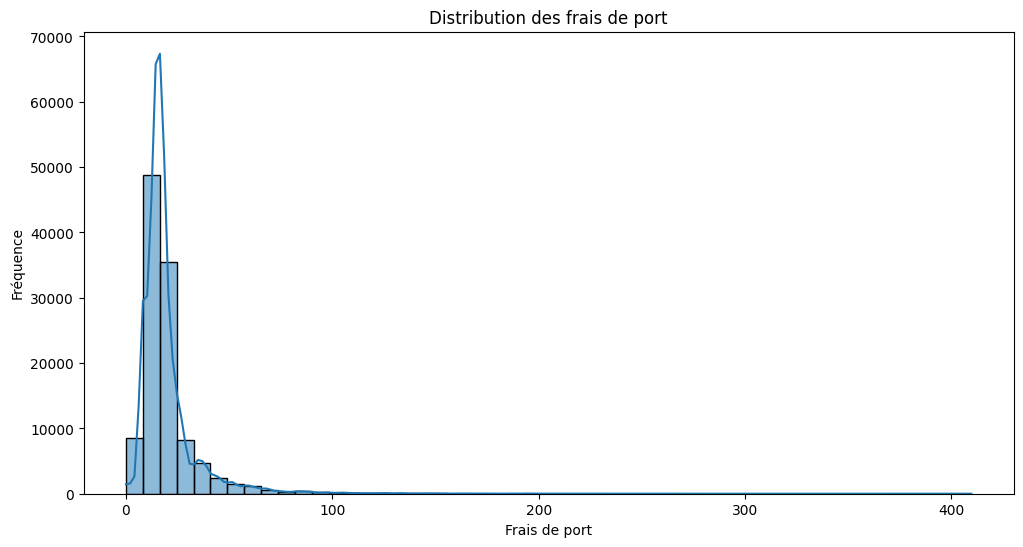

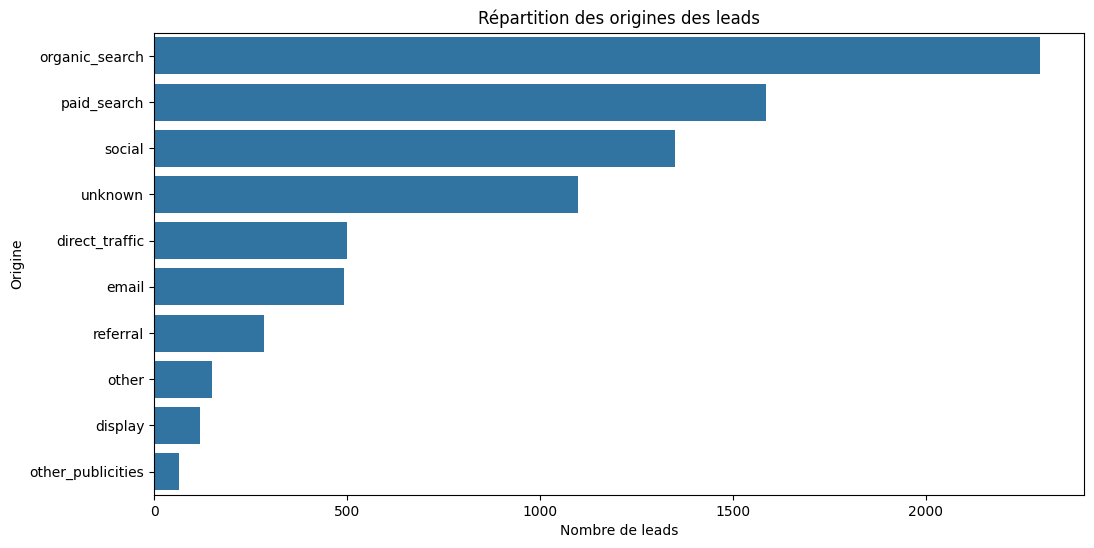

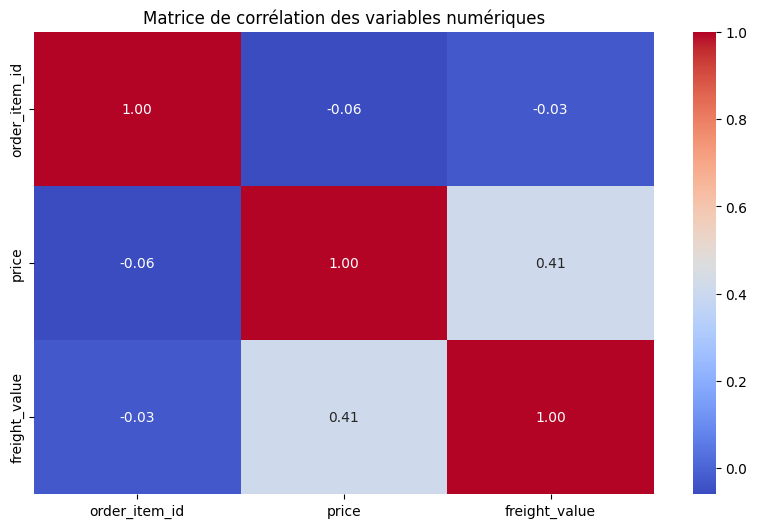

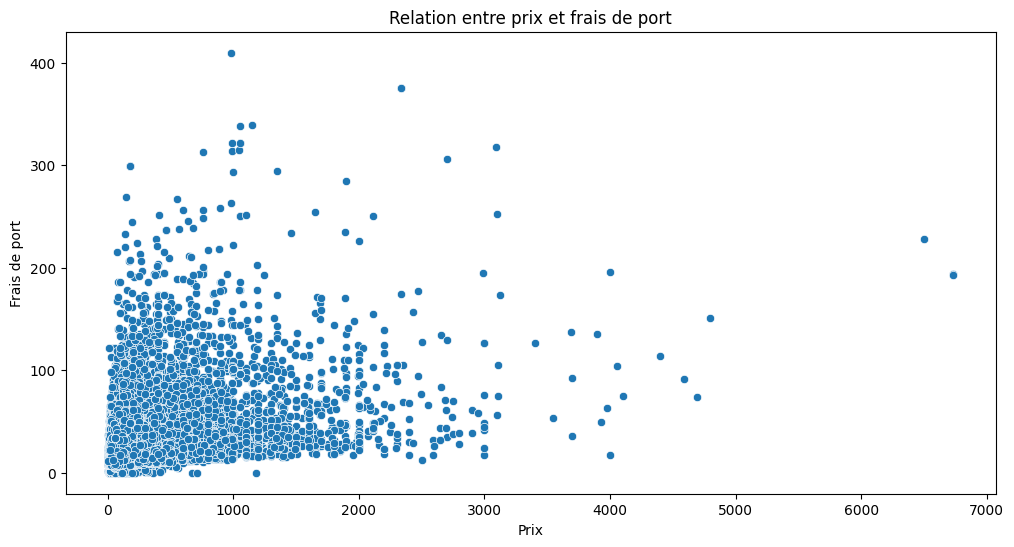


Top 10 des produits les plus vendus :
product_id
aca2eb7d00ea1a7b8ebd4e68314663af    527
99a4788cb24856965c36a24e339b6058    488
422879e10f46682990de24d770e7f83d    484
389d119b48cf3043d311335e499d9c6b    392
368c6c730842d78016ad823897a372db    388
53759a2ecddad2bb87a079a1f1519f73    373
d1c427060a0f73f6b889a5c7c61f2ac4    343
53b36df67ebb7c41585e8d54d6772e08    323
154e7e31ebfa092203795c972e5804a6    281
3dd2a17168ec895c781a9191c1e95ad7    274
Name: count, dtype: int64


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Détection des valeurs manquantes
print("Valeurs manquantes par colonne :")
print(leads_closed.isnull().sum())
print(leads_qualified.isnull().sum())
print(order_items.isnull().sum())

# Statistiques de base pour leads_closed
print("\nStatistiques descriptives de leads_closed :")
print(leads_closed.describe(include='all'))

# Statistiques de base pour leads_qualified
print("\nStatistiques descriptives de leads_qualified :")
print(leads_qualified.describe(include='all'))

# Statistiques de base pour order_items
print("\nStatistiques descriptives de order_items :")
print(order_items.describe(include='all'))

# Visualisation des distributions
plt.figure(figsize=(12, 6))
sns.histplot(order_items['price'], bins=50, kde=True)
plt.title("Distribution des prix des produits")
plt.xlabel("Prix")
plt.ylabel("Fréquence")
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x=order_items['price'])
plt.title("Boxplot des prix des produits")
plt.xlabel("Prix")
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(order_items['freight_value'], bins=50, kde=True)
plt.title("Distribution des frais de port")
plt.xlabel("Frais de port")
plt.ylabel("Fréquence")
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(y=leads_qualified['origin'], order=leads_qualified['origin'].value_counts().index)
plt.title("Répartition des origines des leads")
plt.xlabel("Nombre de leads")
plt.ylabel("Origine")
plt.show()

# Analyse des corrélations
plt.figure(figsize=(10, 6))
sns.heatmap(order_items.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matrice de corrélation des variables numériques")
plt.show()

# Relation entre prix et frais de port
plt.figure(figsize=(12, 6))
sns.scatterplot(x=order_items['price'], y=order_items['freight_value'])
plt.title("Relation entre prix et frais de port")
plt.xlabel("Prix")
plt.ylabel("Frais de port")
plt.show()

# Ajout d'autres analyses possibles
print("\nTop 10 des produits les plus vendus :")
print(order_items['product_id'].value_counts().head(10))


🔹 Étape suivante : Analyse des tendances temporelles 📊
Nous allons examiner l'évolution des commandes et des leads dans le temps.

1️⃣ Évolution des commandes par mois
Ajoutons un graphique montrant comment les commandes évoluent dans le temps.

Correction à appliquer dans ton code :
Ajoute ceci après l'affichage des statistiques :

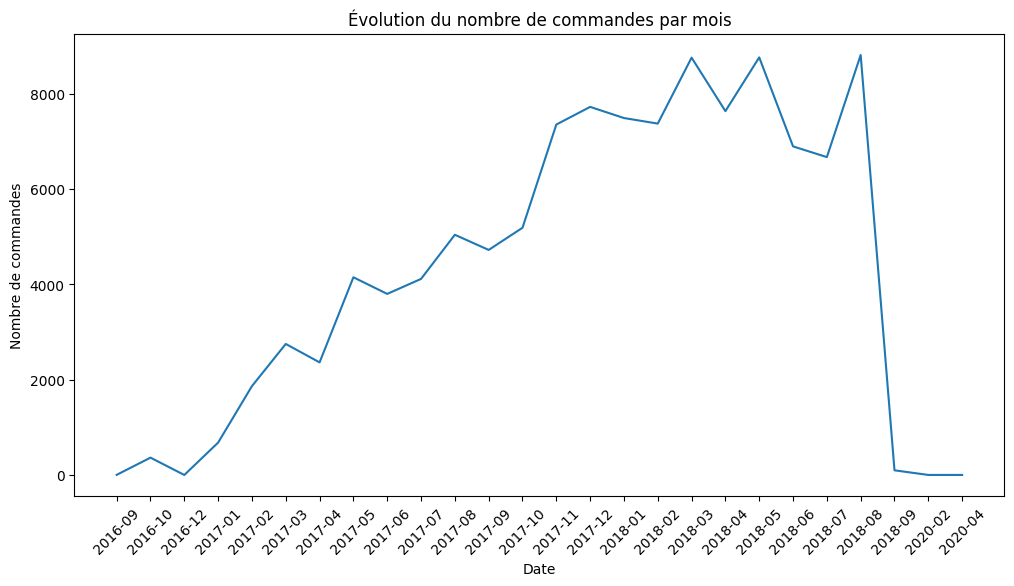

In [11]:
# Conversion en datetime
order_items['shipping_limit_date'] = pd.to_datetime(order_items['shipping_limit_date'])

# Ajouter une colonne année-mois
order_items['year_month'] = order_items['shipping_limit_date'].dt.to_period('M')

# Compter le nombre de commandes par mois
orders_per_month = order_items['year_month'].value_counts().sort_index()

# Visualisation
plt.figure(figsize=(12, 6))
sns.lineplot(x=orders_per_month.index.astype(str), y=orders_per_month.values)
plt.xticks(rotation=45)
plt.title("Évolution du nombre de commandes par mois")
plt.xlabel("Date")
plt.ylabel("Nombre de commandes")
plt.show()


🔹 Analyse des vendeurs les plus performants 👨‍💻
Nous allons identifier les top vendeurs en fonction du nombre de produits vendus.

Ajoute ce code :

In [4]:

file_path = "/content/drive/My Drive/Data_project_Olist/customers.csv"
df_custmers = pd.read_csv(file_path)

<ipython-input-12-877a2bbd0b01>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_sellers.values, y=top_sellers.index, palette="viridis")


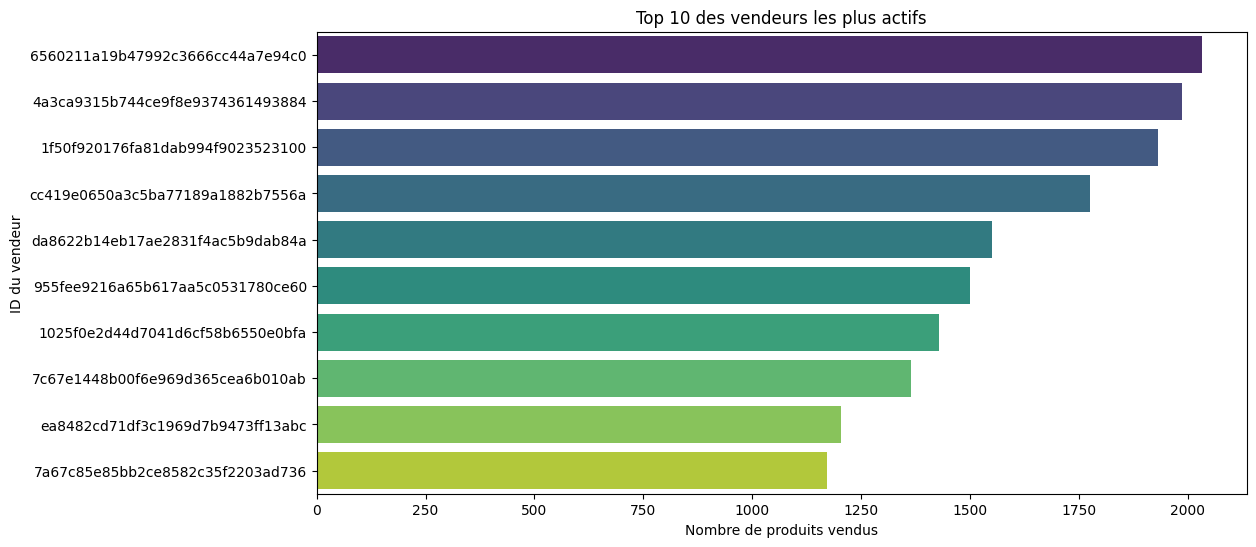

In [12]:
# Top 10 vendeurs avec le plus grand nombre de ventes
top_sellers = order_items['seller_id'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_sellers.values, y=top_sellers.index, palette="viridis")
plt.title("Top 10 des vendeurs les plus actifs")
plt.xlabel("Nombre de produits vendus")
plt.ylabel("ID du vendeur")
plt.show()


In [5]:
pip install gapminder ydata-profiling


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 24.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 26.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 41.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 99.1 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=0ee61e47827c04bdb56d2aef47461b49bae08fbfc111179408ba4048b8879db6
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [6]:
from ydata_profiling import ProfileReport
from gapminder import gapminder
ProfileReport(gapminder)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]